In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/product-classification-and-clustering/pricerunner_aggregate.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math

In [3]:
train_path = '/kaggle/input/product-classification-and-clustering/pricerunner_aggregate.csv'

In [4]:
train_ds = pd.read_csv(train_path)
train_ds.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [5]:
train_ds.columns

Index(['Product ID', 'Product Title', ' Merchant ID', ' Cluster ID',
       ' Cluster Label', ' Category ID', ' Category Label'],
      dtype='object')

In [6]:
final_train = pd.get_dummies(train_ds)
final_train 

,Product ID,Merchant ID,Cluster ID,Category ID,Product Title_10 hd portable television august da100d,Product Title_10 kg washing machine with add wash,Product Title_10 place built in dishwasher 8 progs class a white,Product Title_10 place dishwasher 7 progs delay timer class a white,Product Title_10 place slimline dishwasher 5 progs class a silver,Product Title_10 place slimline dishwasher 5 progs class a white,...,Category Label_CPUs,Category Label_Digital Cameras,Category Label_Dishwashers,Category Label_Freezers,Category Label_Fridge Freezers,Category Label_Fridges,Category Label_Microwaves,Category Label_Mobile Phones,Category Label_TVs,Category Label_Washing Machines
0,1,1,1,2612,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2,2,1,2612,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,3,1,2612,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,4,1,2612,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,5,5,1,2612,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35306,47350,59,47517,2623,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
35307,47351,59,47518,2623,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
35308,47352,59,47519,2623,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
35309,47355,125,47524,2623,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [7]:
product = final_train.iloc[5:,:4]
product.head()

,Product ID,Merchant ID,Cluster ID,Category ID
5,6,6,1,2612
6,7,7,1,2612
7,8,8,1,2612
8,9,9,1,2612
9,10,10,1,2612


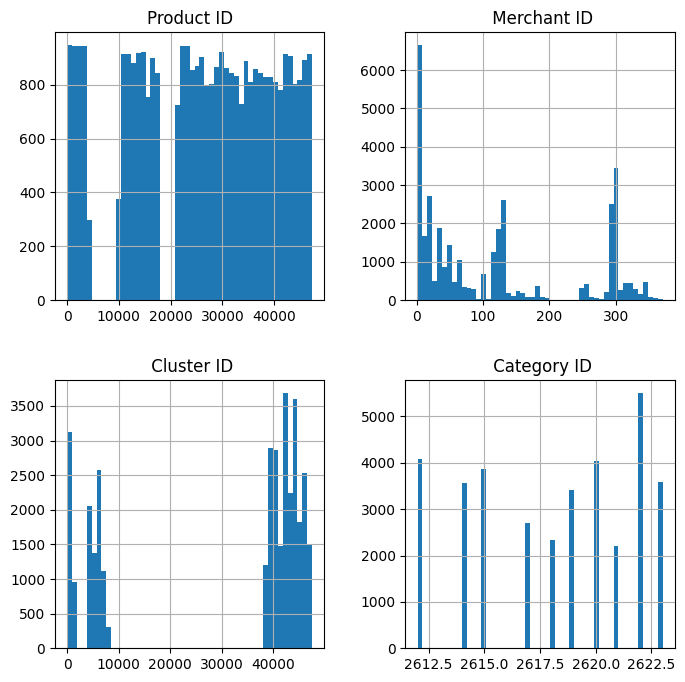

In [8]:
# Plot histograms of the featuers to visualize the data
product.hist(bins=50, figsize = (8,8))
plt.show()

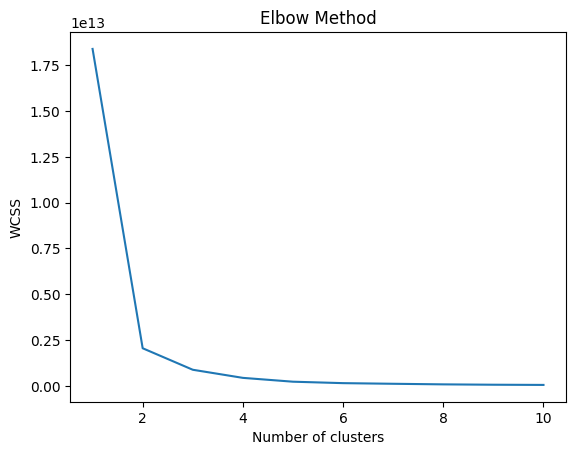

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=20, random_state=0)
    kmeans.fit(product)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=400, n_init=20, random_state=0)
kmeans.fit(product)
k_class = kmeans.predict(product)

In [11]:
# Using PCA and filtering 4 principal components for data visualization
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(product)
PDF = pd.DataFrame(data = principalComponents, columns = ['Product ID', 'Merchant ID', 'Cluster ID','Category ID'])

In [12]:
# Add a column 'Class' to the data sets
PDF.loc[:, 'Cluster'] = pd.Series(k_class)
product_clss = product.copy()
product_clss['Class'] = k_class

In [13]:
# Count of points in each cluster
PDF['Cluster'].value_counts()

Cluster
2    11946
1    11858
3     7426
0     4076
Name: count, dtype: int64

In [14]:
# Assign a color to each cluster
PDF['Color'] = PDF['Cluster'].map({0 : 'red', 1 : 'blue', 2 : 'green', 3: 'black'})

/tmp/ipykernel_18/3465206569.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(a1, a2, c=c1, alpha=0.3, cmap='viridis')


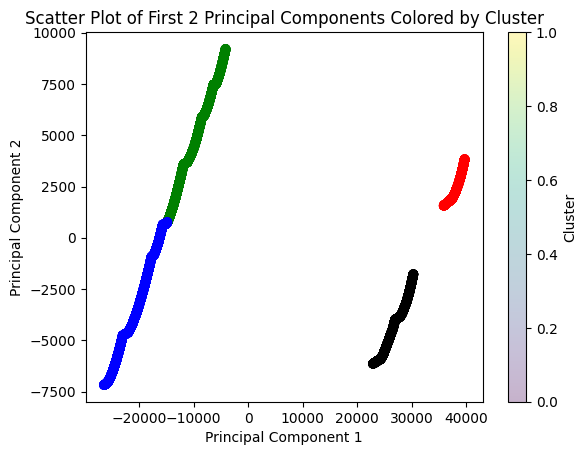

In [15]:
a1 = PDF['Product ID']
a2 = PDF['Merchant ID']
a3 = PDF['Cluster ID']
c1 = PDF['Color']  

plt.scatter(a1, a2, c=c1, alpha=0.3, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First 2 Principal Components Colored by Cluster')
plt.colorbar(label='Cluster')  
plt.show()

/tmp/ipykernel_18/3062444694.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(a1, a2, a3, c=c1, cmap='viridis', alpha=0.3)
/tmp/ipykernel_18/3062444694.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.colorbar(ax.scatter(a1, a2, a3, c=c1, cmap='viridis'), label='Cluster')


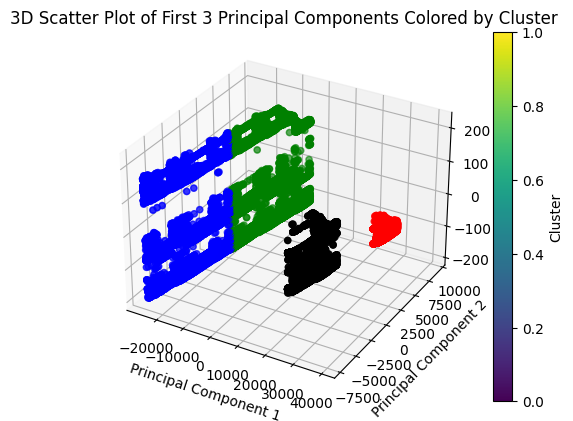

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1, a2, a3, c=c1, cmap='viridis', alpha=0.3)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of First 3 Principal Components Colored by Cluster')
plt.colorbar(ax.scatter(a1, a2, a3, c=c1, cmap='viridis'), label='Cluster')  

plt.show()

In [17]:
product_clss.groupby(['Class']).mean()

,Product ID,Merchant ID,Cluster ID,Category ID
Class,,,,
0,2048.009568,22.929833,545.249019,2612.000000
1,40802.191685,175.425451,44946.805026,2622.021083
2,27430.278922,138.601289,40648.553491,2618.643981
3,13944.075141,57.317398,5716.296391,2614.520065


In [18]:
# Slipt the data into train and test data sets
X = product_clss.iloc[:, :-1]
Y = product_clss.iloc[:, -1]
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Text(0.5, 1.0, 'k v/s Accuracy for KNN')

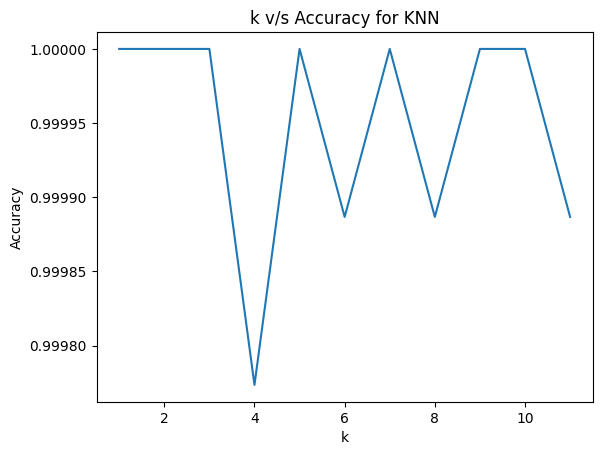

In [19]:
# KNN for various values of k and plot of k v/s accuracy
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors = i).fit(xTrain, yTrain)
    accuracy.append(knn.score(xTest, yTest))

plt.plot(range(1,12), accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy') 
plt.title('k v/s Accuracy for KNN')

In [20]:
# KNN model and evaluation 
knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1).fit(xTrain, yTrain)
knn_predictions = knn.predict(xTest)
knn_accuracy = knn.score(xTest, yTest)
knn_accuracy

1.0

In [21]:
knn_CM = confusion_matrix(yTest, knn_predictions) # KNN Confusion Matrix
knn_CM

array([[ 993,    0,    0,    0],
       [   0, 2991,    0,    0],
       [   0,    0, 2979,    0],
       [   0,    0,    0, 1864]])

In [22]:
# Decision Tree Classifier and evaluation model
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(xTrain, yTrain) 
dtree_predictions = dtree_model.predict(xTest)
dt_accuracy = dtree_model.score(xTest, yTest)
dt_accuracy

0.8875042483289906

In [23]:
DT_CM = confusion_matrix(yTest, dtree_predictions) # Decision Tree confusion Matrix
DT_CM

array([[   0,    0,    0,  993],
       [   0, 2991,    0,    0],
       [   0,    0, 2979,    0],
       [   0,    0,    0, 1864]])

In [24]:
# Gaussian Naive Bayes model 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(xTrain, yTrain)
gnb_predictions = gnb.predict(xTest)
gnb_accuracy = gnb.score(xTest, yTest)
gnb_accuracy

0.9870850798685851

In [25]:
NB_CM = confusion_matrix(yTest, gnb_predictions) # Naive Bayes confusion Matrix
NB_CM

array([[ 993,    0,    0,    0],
       [   0, 2877,  114,    0],
       [   0,    0, 2979,    0],
       [   0,    0,    0, 1864]])